In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

from numpy.linalg import svd, pinv
from scipy.linalg import eig

In [2]:
Lx, Ly, Lz = 9,9,1
Nx, Ny, Nz = 288, 288, 32

Ra_D = -1.24e5
Prandtl = 0.7
N_s2 = 2

D_0 = 0
D_H = 1
M_0 = 0
M_H = -1

dealias = 3/2
stop_sim_time = 700
timestepper = d3.RK222
max_timestep = 0.125
dtype = np.float64

nu = (Ra_D / (Prandtl*(D_0-D_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5']


In [4]:
def get_all_data(task, Nz):
    recorded = False
    for file in file_paths:
        with h5py.File(file, mode='r') as file:
            st = file['scales/sim_time']
            simtime = np.array(st)
            avg_0 = file["tasks"][task]
            avg = np.reshape(avg_0, (len(simtime),Nz))
            for t in range(len(simtime)):
                avg_T=np.transpose(avg[t,:])
                avg_T = np.reshape(avg_T, (1, Nz))
                if recorded == False:
                    avg_all_time = avg_T
                    recorded = True
                else:
                    avg_all_time = np.concatenate((avg_all_time, avg_T))
    print(np.shape(avg_all_time))
    print(np.shape(np.transpose(avg_all_time[:,:])))
    avg_allt_T=np.transpose(avg_all_time[:,:])
    return avg_allt_T
def draw_contour(avg_allt_T, task):
    plt.contourf(avg_allt_T, cmap='Spectral_r')
    plt.colorbar(label=f'{task}')
    plt.xlabel('time')
    plt.ylabel('z')
    plt.title(f'{task} vs time')
    #plt.savefig(f'{task.replace(" ", "_")}.png', dpi=200,bbox_inches='tight')
    plt.show()
    matplotlib.pyplot.close()

(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(64, 4000)


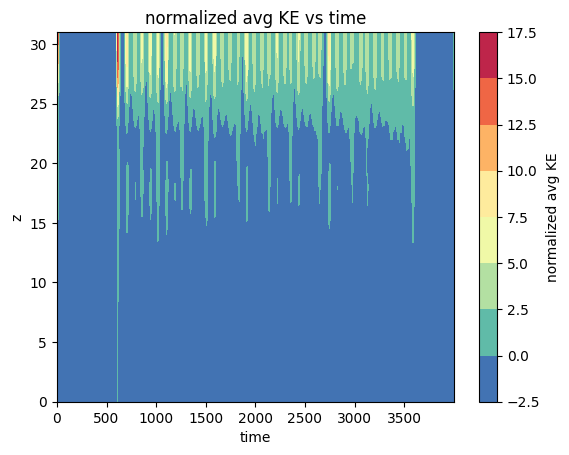

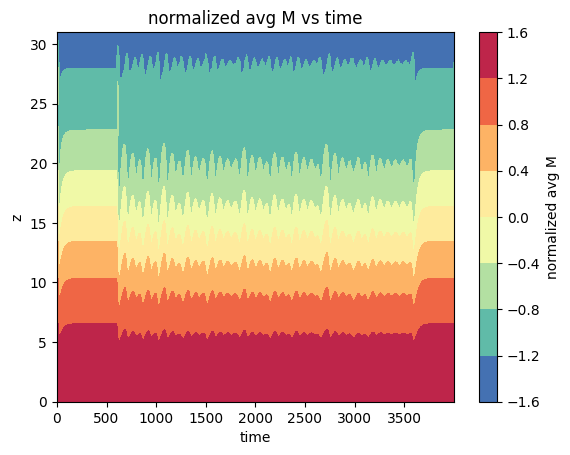

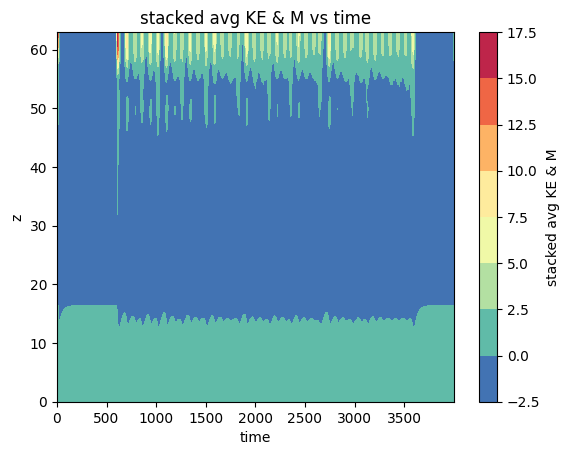

In [5]:
avg_KE_all_time = get_all_data("avg KE by xy", Nz)
avg_M_all_time = get_all_data("avg M by xy", Nz)
avg_nD_all_time = get_all_data("avg -D by xy", Nz)

avg_KE_mean_byrow = np.mean(avg_KE_all_time, axis=1, keepdims = True)
avg_M_mean_byrow = np.mean(avg_M_all_time, axis=1, keepdims = True)
avg_KE_mean = np.mean(avg_KE_all_time)
avg_M_mean = np.mean(avg_M_all_time)


avg_KE_std_byrow = np.std(avg_KE_all_time, axis=1, keepdims = True)
avg_M_std_byrow = np.std(avg_M_all_time, axis=1, keepdims = True)
avg_KE_std = np.std(avg_KE_all_time)
avg_M_std = np.std(avg_M_all_time)


nmlzd_avg_KE_row = (avg_KE_all_time-avg_KE_mean_byrow)/avg_KE_std_byrow
nmlzd_avg_M_row = (avg_M_all_time-avg_M_mean_byrow)/avg_M_std_byrow
nmlzd_avg_KE = (avg_KE_all_time-avg_KE_mean)/avg_KE_std
nmlzd_avg_M = (avg_M_all_time-avg_M_mean)/avg_M_std
stacked_KEM = np.vstack((nmlzd_avg_M , nmlzd_avg_KE))

print(np.shape(stacked_KEM))
#draw_contour(avg_KE_all_time, "avg KE")
#draw_contour(avg_M_all_time, "avg M")
#draw_contour(avg_nD_all_time, "avg -H")
draw_contour(nmlzd_avg_KE, "normalized avg KE")
draw_contour(nmlzd_avg_M, "normalized avg M")
draw_contour(stacked_KEM, "stacked avg KE & M")

(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(4000, 32)
(32, 4000)
(39, 2700)


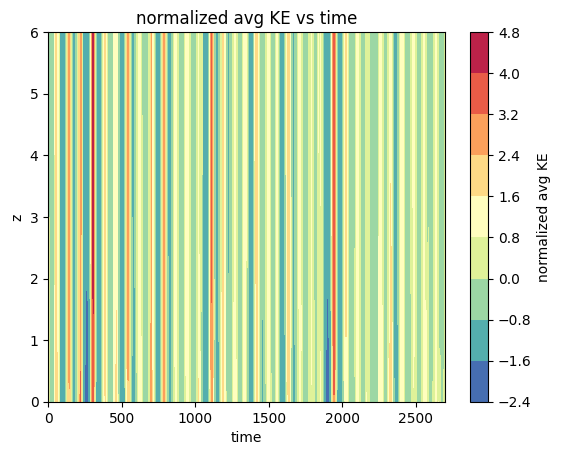

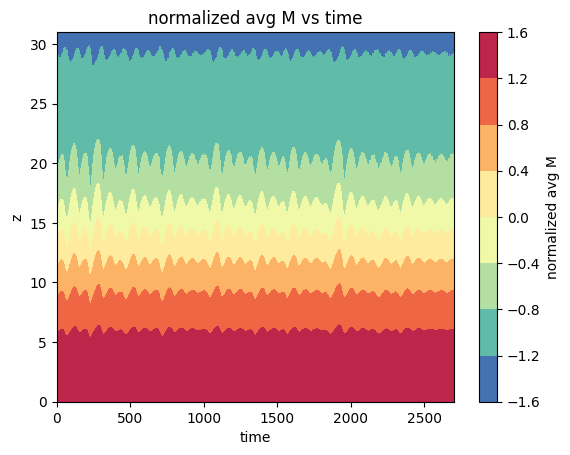

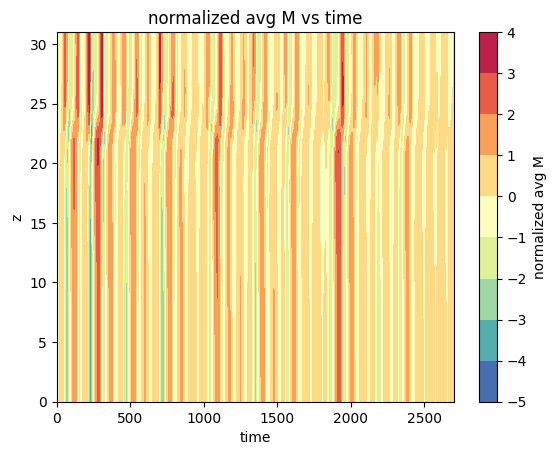

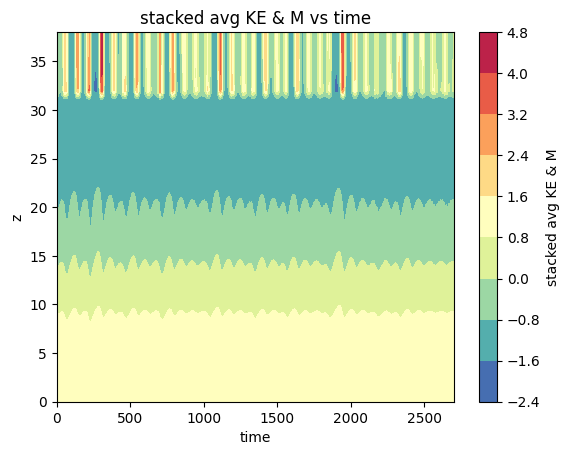

In [6]:
avg_KE_all_time = get_all_data("avg KE by xy", Nz)[25:,800:3500]
avg_M_all_time = get_all_data("avg M by xy", Nz)[:, 800:3500]
avg_nD_all_time = get_all_data("avg -D by xy", Nz)

avg_KE_mean_byrow = np.mean(avg_KE_all_time, axis=1, keepdims = True)
avg_M_mean_byrow = np.mean(avg_M_all_time, axis=1, keepdims = True)
avg_KE_mean = np.mean(avg_KE_all_time)
avg_M_mean = np.mean(avg_M_all_time)


avg_KE_std_byrow = np.std(avg_KE_all_time, axis=1, keepdims = True)
avg_M_std_byrow = np.std(avg_M_all_time, axis=1, keepdims = True)
avg_KE_std = np.std(avg_KE_all_time)
avg_M_std = np.std(avg_M_all_time)


nmlzd_avg_KE_row = (avg_KE_all_time-avg_KE_mean_byrow)/avg_KE_std_byrow
nmlzd_avg_M_row = (avg_M_all_time-avg_M_mean_byrow)/avg_M_std_byrow
nmlzd_avg_KE = (avg_KE_all_time-avg_KE_mean)/avg_KE_std
nmlzd_avg_M = (avg_M_all_time-avg_M_mean)/avg_M_std

stacked_KEM = np.vstack((nmlzd_avg_M , nmlzd_avg_KE_row))

print(np.shape(stacked_KEM))
#draw_contour(avg_KE_all_time, "avg KE")
#draw_contour(avg_M_all_time, "avg M")
#draw_contour(avg_nD_all_time, "avg -H")
draw_contour(nmlzd_avg_KE_row, "normalized avg KE")
draw_contour(nmlzd_avg_M, "normalized avg M")
draw_contour(nmlzd_avg_M_row, "normalized avg M")
draw_contour(stacked_KEM, "stacked avg KE & M")

In [7]:
def DMD2(mat_A, r=None):
    """
    Perform Dynamic Mode Decomposition (DMD) on the dataset KE_all_time.

    Parameters:
    - KE_all_time: NumPy array of shape (32, 2000), where each column is a data snapshot.
    - r: Number of singular values/modes to keep. If None, use full rank.

    Returns:
    - Phi: DMD modes
    - Lambda: Eigenvalues of the DMD modes
    - b: Amplitudes of the DMD modes
    """

    # Step 1: Prepare the data matrices X and X'
    X = mat_A[:, :-1]
    X_prime = mat_A[:, 1:]

    # Step 2: Perform SVD on X
    U, Sigma, Vh = svd(X, full_matrices=False) # it is in the reduced form
    if r is not None:
        U = U[:, :r]
        Sigma = Sigma[:r]
        Vh = Vh[:r, :]

    # Step 3: Compute the pseudo-inverse of Sigma for the best-fit linear operator
    Sigma_inv = np.diag(1.0 / Sigma)

    # Compute the approximate linear operator A_tilde
    A_tilde = U.T @ X_prime @ Vh.T @ Sigma_inv

    # Step 4: Compute eigenvalues and eigenvectors of A_tilde
    Lambda, W = eig(A_tilde)

    # Compute DMD modes
    Phi = U @ W  #########################################

    # Compute DMD amplitudes
    b = pinv(Phi) @ mat_A[:, 0]

    return Phi, Lambda

In [8]:

def DMD(mat_A, r=None):
    """
    Perform Dynamic Mode Decomposition (DMD) on the dataset KE_all_time.

    Parameters:
    - KE_all_time: NumPy array of shape (32, 2000), where each column is a data snapshot.
    - r: Number of singular values/modes to keep. If None, use full rank.

    Returns:
    - Phi: DMD modes
    - Lambda: Eigenvalues of the DMD modes
    - b: Amplitudes of the DMD modes
    """

    # Step 1: Prepare the data matrices X and X'
    X = mat_A[:, :-1]
    X_prime = mat_A[:, 1:]

    # Step 2: Perform SVD on X
    U, Sigma, Vh = svd(X, full_matrices=False) # it is in the reduced form
    if r is not None:
        U = U[:, :r]
        Sigma = Sigma[:r]
        Vh = Vh[:r, :]

    # Step 3: Compute the pseudo-inverse of Sigma for the best-fit linear operator
    Sigma_inv = np.diag(1.0 / Sigma)

    # Compute the approximate linear operator A_tilde
    A_tilde = U.T @ X_prime @ Vh.T @ Sigma_inv

    # Step 4: Compute eigenvalues and eigenvectors of A_tilde
    Lambda, W = eig(A_tilde)

    # Compute DMD modes
    Phi = X_prime @ Vh.T @ Sigma_inv @ W

    # Compute DMD amplitudes
    b = pinv(Phi) @ mat_A[:, 0]

    return Phi, Lambda

# Assuming KE_all_time is your (32, 4000) data array
# KE_all_time = np.random.rand(32, 4000)  # Example initialization, replace with your data

# Perform DMD (specify 'r' as needed, e.g., r=10 for top 10 modes)
# Phi, Lambda, b = DMD(KE_all_time, r=10)

# Now, Phi contains the DMD modes, Lambda contains the eigenvalues, and b contains the mode amplitudes

def compute_future_states(PHI, LAMBDA, B, TIMESTEPS, DT):
    """
    Compute the approximate solution at future times using DMD.

    Parameters:
    - Phi: DMD modes.
    - Lambda: Eigenvalues of the DMD modes.
    - b: Amplitudes of the DMD modes.
    - timesteps: Number of future time steps to compute.
    - dt: Time step between measurements in the original data.

    Returns:
    - X_future: The approximate future states of the system.
    """
    omega = np.log(LAMBDA) / DT
    t = np.arange(TIMESTEPS) * DT
    X_future = np.zeros((PHI.shape[0], TIMESTEPS), dtype=np.complex_)

    for i in range(TIMESTEPS):
        X_future[:, i] = np.dot(PHI, B * np.exp(omega * t[i]))
    
    return X_future.real

# Assuming KE_all_time is your data and you've already computed Phi, Lambda, b
# For example purposes, let's set some parameters
# Number of future time steps to predict
# Time step between snapshots in your original data

# Compute future states
# X_future = compute_future_states(Phi, Lambda, b, timesteps, dt)

# Note: This code assumes a consistent time step 'dt' between your original data snapshots.
# 'X_future' will contain the real part of the future states of the system.
# Adjust 'timesteps' and 'dt' as needed for your specific application.


In [21]:
def local_look(begin_time, end_time, data_all, name, time):
    datasample = data_all[:, begin_time:end_time]
    phi, Lam = DMD(datasample)
    b = pinv(phi) @ data_all[:,time]
    dt = 1
    timesteps = 500
    future_data = compute_future_states(phi, Lam, b, timesteps, 1)
    n_rows, n_columns = datasample.shape
    x_ax = np.linspace(begin_time, end_time, n_columns)
    y_ax = np.linspace(0, n_rows-1, n_rows)
    X_ax, Y_ax = np.meshgrid(x_ax, y_ax)
    plt.figure(figsize=(16, 4))
    plt.subplot(1,2,1)
    plt.contourf(X_ax, Y_ax, datasample, cmap='Spectral_r')
    plt.colorbar(label=f'avg_{name}')
    plt.xlabel('time')
    plt.ylabel('z')
    plt.title(f'avg {name} by z vs time')
    # plt.savefig(f'.png', dpi=200,bbox_inches='tight')
    plt.subplot(1,2,2)
    plt.contourf(future_data, cmap='Spectral_r')
    plt.colorbar(label=f'avg_{name}')
    plt.xlabel('time')
    plt.ylabel('z')
    plt.title(f'avg {name} by z vs time')
    # plt.savefig(f'.png', dpi=200,bbox_inches='tight')
    plt.show()
    plt.clf()

In [22]:
#for beginning_time in range(600, 3000, 100):
#    local_look(beginning_time, 3500, avg_KE_all_time, 'KE')
# 1800 and 2800 are best two

In [23]:
#for beginning_time in range(600, 3000, 100):
#    local_look(beginning_time, 3500, avg_M_all_time, 'M')

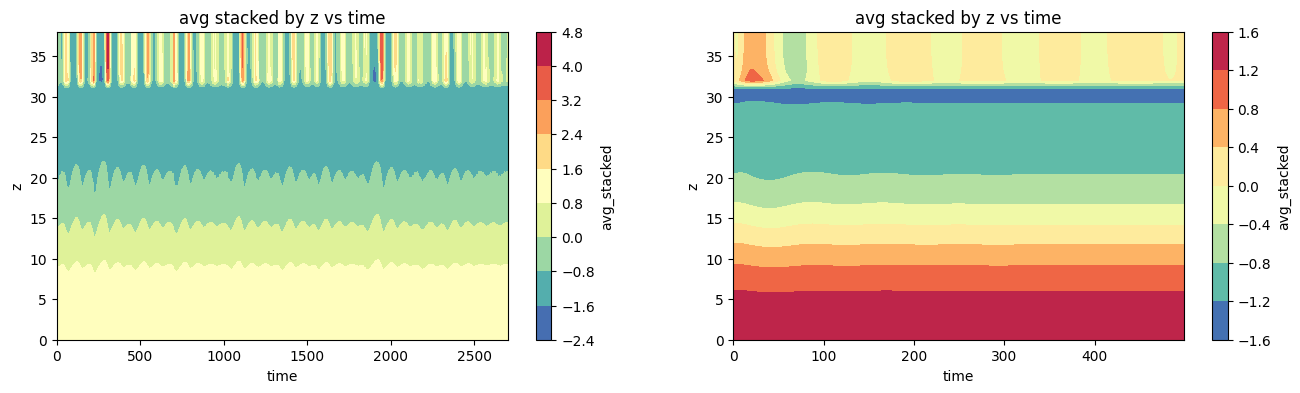

<Figure size 640x480 with 0 Axes>

In [24]:
local_look(0, 2700, stacked_KEM, "stacked", -1)

In [25]:
name = "stacked"
datasample = stacked_KEM
phi, Lam = DMD(datasample)
b = pinv(phi) @ datasample[:,-1] ##################
dt = 1
timesteps = 500
future_data = compute_future_states(phi, Lam, b, timesteps, 1)
n_rows, n_columns = datasample.shape
x_ax = np.linspace(800, 3500, n_columns)
y_ax = np.linspace(0, n_rows-1, n_rows)
X_ax, Y_ax = np.meshgrid(x_ax, y_ax)

phi2, Lam2 = DMD2(datasample)
b2 = pinv(phi2) @ datasample[:,-1] ##############
future_data2 = compute_future_states(phi2, Lam2, b2, timesteps, 1)
diff = future_data - future_data2
print(diff)
print(np.max(diff))
print(diff/future_data)
print(np.max(diff/future_data), np.mean(diff/future_data))

[[ 1.90996730e-09 -1.14726710e-08 -3.21928195e-08 ... -2.32355468e-10
  -4.20640633e-10 -6.03813888e-10]
 [-5.65404457e-09 -1.01007098e-07 -2.95226074e-07 ... -2.10595075e-09
  -3.79758047e-09 -5.44317902e-09]
 [-2.59172905e-08 -2.77289994e-07 -8.17537663e-07 ... -5.85064019e-09
  -1.05337614e-08 -1.50893147e-08]
 ...
 [ 9.72999516e-05  7.09059250e-04  1.01861625e-03 ...  2.48554630e-05
   2.46651843e-05  2.43317118e-05]
 [ 9.72628216e-05  7.24008955e-04  1.03491180e-03 ...  2.49057199e-05
   2.47093672e-05  2.43698099e-05]
 [ 9.70458950e-05  7.26297494e-04  1.03745039e-03 ...  2.49132562e-05
   2.47159855e-05  2.43755088e-05]]
0.0015624192449188515
[[ 1.22749118e-09 -7.37322364e-09 -2.06896092e-08 ... -1.49337637e-10
  -2.70350761e-10 -3.88078397e-10]
 [-3.67389412e-09 -6.56331100e-08 -1.91835736e-07 ... -1.36909308e-09
  -2.46883297e-09 -3.53864756e-09]
 [-1.72194800e-08 -1.84236228e-07 -5.43199181e-07 ... -3.89268414e-09
  -7.00856535e-09 -1.00395693e-08]
 ...
 [ 1.35645851e-03  2.7

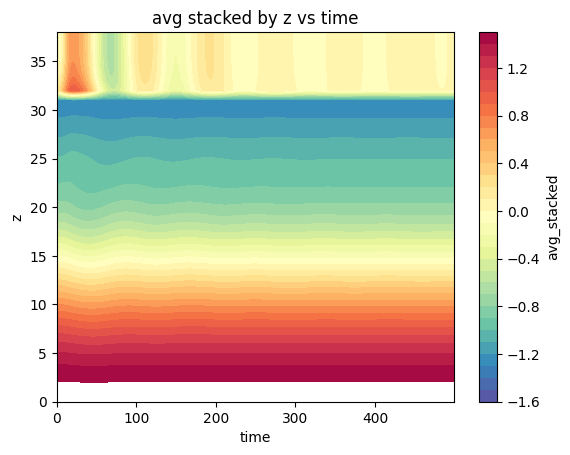

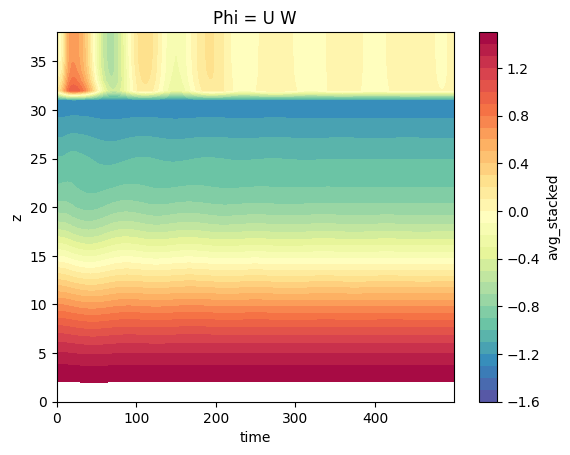

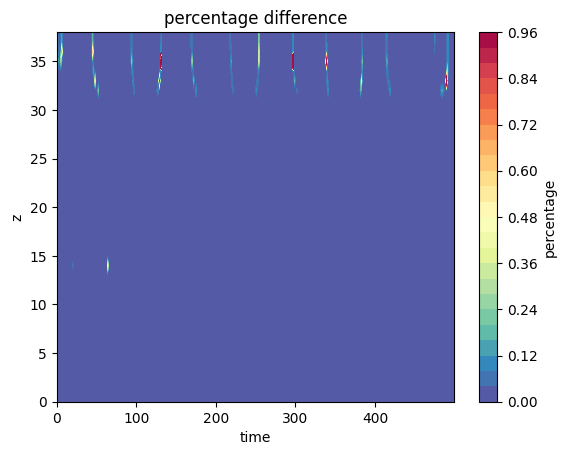

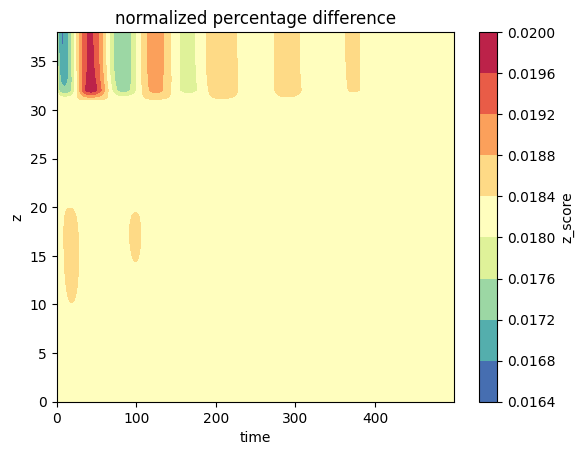

In [27]:
levels = np.arange(-1.6, 1.6, 0.1)
plt.contourf(future_data, levels, cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'avg {name} by z vs time')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()
plt.clf()

plt.contourf(future_data2, levels, cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'Phi = U W')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()

plt.contourf(np.abs(diff/future_data), np.arange(0, 1, 0.04), cmap='Spectral_r')
plt.colorbar(label=f'percentage')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'percentage difference')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()

diff_mean = np.mean(diff)
diff_std = np.std(diff)

plt.contourf(np.abs(diff-diff_mean/diff_std), cmap='Spectral_r')
plt.colorbar(label=f'z_score')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'normalized percentage difference')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()

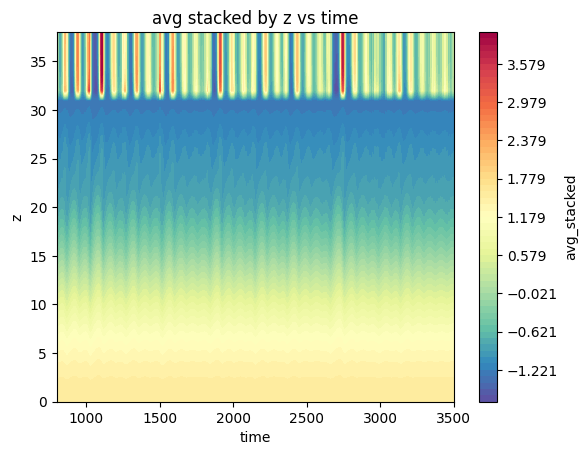

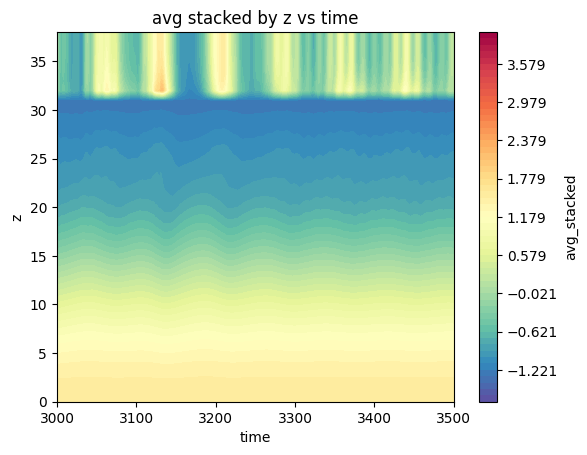

<Figure size 640x480 with 0 Axes>

In [28]:
levels = np.arange(np.min(datasample), np.max(datasample), 0.1)
plt.contourf(X_ax, Y_ax, datasample, levels, cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'avg {name} by z vs time')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()
plt.clf()

plt.contourf(X_ax[:,-501:], Y_ax[:,-501:], datasample[:,-501:], levels, cmap='Spectral_r')
plt.colorbar(label=f'avg_{name}')
plt.xlabel('time')
plt.ylabel('z')
plt.title(f'avg {name} by z vs time')
# plt.savefig(f'.png', dpi=200,bbox_inches='tight')
plt.show()
plt.clf()

[-0.12886519+0.05953409j -0.12886519-0.05953409j  0.00839745+0.19103582j
  0.00839745-0.19103582j  0.01421977+0.j          0.0835405 +0.j
  0.16896564+0.23905924j  0.16896564-0.23905924j  0.16413516+0.j
  0.28921129+0.21889338j  0.28921129-0.21889338j  0.49230418+0.26265201j
  0.49230418-0.26265201j  0.39847393+0.05675717j  0.39847393-0.05675717j
  0.46342267+0.j          0.71160631+0.23670774j  0.71160631-0.23670774j
  0.62556369+0.14096397j  0.62556369-0.14096397j  0.86557392+0.24130488j
  0.86557392-0.24130488j  0.90157045+0.14867106j  0.90157045-0.14867106j
  0.76686118+0.11661412j  0.76686118-0.11661412j  1.        +0.j
  0.98832033+0.07504003j  0.98832033-0.07504003j  0.98902644+0.0252257j
  0.98902644-0.0252257j   0.93894342+0.06402015j  0.93894342-0.06402015j
  0.77331048+0.0535674j   0.77331048-0.0535674j   0.90648926+0.01856382j
  0.90648926-0.01856382j  0.84894578+0.00765254j  0.84894578-0.00765254j]


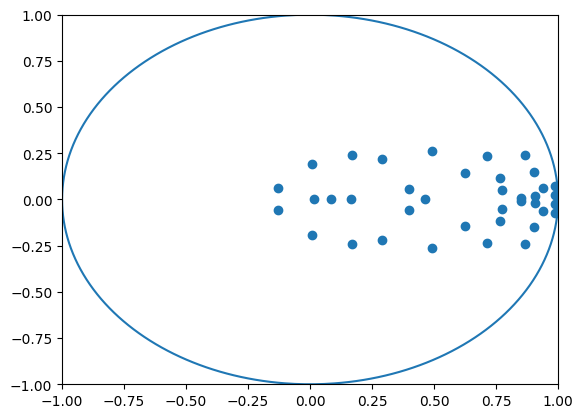

In [29]:
print(Lam)
dummy = np.arange(0,2 *np.pi,0.01)
plt.scatter(np.real(Lam),np.imag(Lam))
plt.plot(np.cos(dummy),np.sin(dummy))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

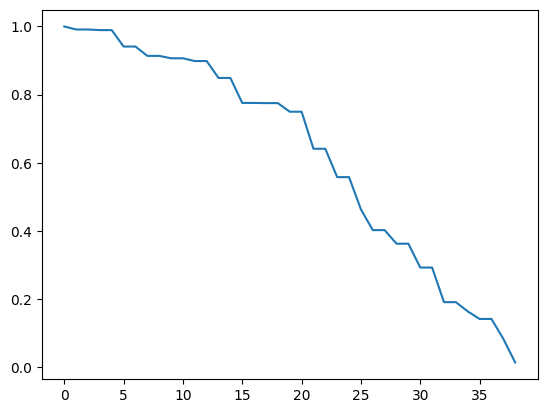

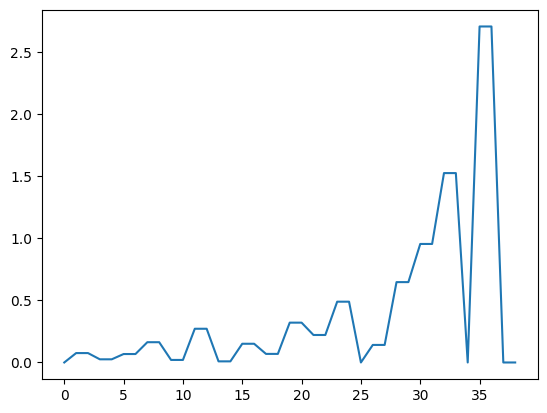

82.91193828356545


In [30]:
Lam_sort = Lam[np.argsort(-np.abs(Lam))]
plt.plot(np.abs(Lam_sort))
plt.show()
plt.plot(np.abs(np.angle(Lam_sort)))
plt.show()
print(2* np.pi/np.abs(np.angle(Lam_sort[1])))

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (7, 0)

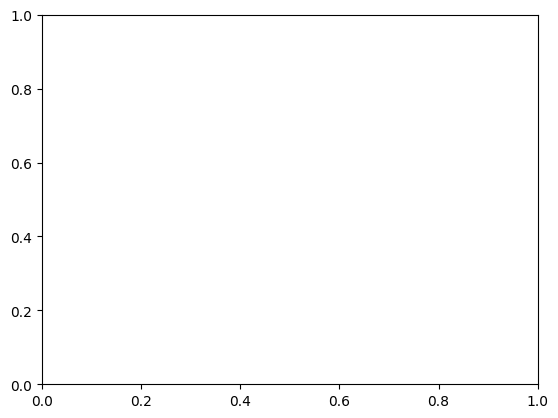

In [18]:
beg_os_t = 0
end_os_t = 0
avg_KE_loc_T=avg_KE_all_time[:, beg_os_t:end_os_t] # This is where we want to show from the sample data
avg_M_loc_T=avg_M_all_time[:, beg_os_t:end_os_t]
#avg_nD_loc_T=np.transpose(avg_nD_all_time[beg_os_t:end_os_t,:])

n_rows, n_columns = avg_KE_loc_T.shape
x_ax = np.linspace(beg_os_t, end_os_t, n_columns)
y_ax = np.linspace(0, n_rows-1, n_rows)
X_ax, Y_ax = np.meshgrid(x_ax, y_ax)

# KEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKE
plt.contourf(X_ax, Y_ax, avg_KE_loc_T, cmap='Spectral_r')
plt.colorbar(label='avg_KE')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg KE by z vs time')
# plt.savefig(f'avg_KE_local.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()

plt.contourf(future_KE, cmap='Spectral_r')
plt.colorbar(label='avg_KE')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg KE by z vs time')
# plt.savefig(f'predict_avg_KE_t.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()

# MMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
plt.contourf(X_ax, Y_ax, avg_M_loc_T, cmap='Spectral_r')
plt.colorbar(label='avg_M')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg M by z vs time')
# plt.savefig(f'avg_KE_local.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()

plt.contourf(future_M, cmap='Spectral_r')
plt.colorbar(label='avg_M')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg M by z vs time')
# plt.savefig(f'predict_avg_KE_t.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()

# DDDDDDDDDDDDDDDDDDDDDDDDDDDDDD
"""
plt.contourf(X_ax, Y_ax, avg_nD_loc_T, cmap='Spectral_r')
plt.colorbar(label='avg_nD')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg nD by z vs time')
# plt.savefig(f'avg_KE_local.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()

plt.contourf(future_nD, cmap='Spectral_r')
plt.colorbar(label='avg_nD')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg nD by z vs time')
# plt.savefig(f'predict_avg_KE_t.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()"""

In [ ]:
# The following are saved for debugging purpose
"""
recorded = False
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        st = file['scales/sim_time']
        simtime = np.array(st)
        avg_KE_0 = file["tasks"]["avg KE by z"]
        avg_KE = np.reshape(avg_KE_0, (len(simtime),Nz))
        for t in range(len(simtime)):
            avg_KE_T=np.transpose(avg_KE[t,:])
            avg_KE_T = np.reshape(avg_KE_T, (1, Nz))
            if recorded == False:
                avg_KE_all_time = avg_KE_T
                recorded = True
            else:
                avg_KE_all_time = np.concatenate((avg_KE_all_time, avg_KE_T))
print(np.shape(avg_KE_all_time))
print(np.shape(np.transpose(avg_KE_all_time[:,:])))
avg_KE_allt_T=np.transpose(avg_KE_all_time[:,:])
plt.contourf(avg_KE_allt_T, cmap='Spectral_r')
plt.colorbar(label='avg_KE')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg KE by z vs time')
plt.savefig(f'avg_KE_t.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()"""
"""
recorded = False
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        avg_M_0 = file["tasks"]["avg M by z"]
        avg_M = np.reshape(avg_M_0, (len(simtime), Nz)) # which is (1000, 32)
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(len(simtime)):
            avg_M_T=np.transpose(avg_M[t,:])
            avg_M_T = np.reshape(avg_M_T, (1, Nz))
            if recorded == False:
                avg_M_all_time = avg_M_T
                recorded = True
            else:
                avg_M_all_time = np.concatenate((avg_M_all_time, avg_M_T))
print(np.shape(avg_M_all_time))
print(np.shape(np.transpose(avg_M_all_time[:,:])))
avg_M_allt_T=np.transpose(avg_M_all_time[:,:])
plt.contourf(avg_M_allt_T, cmap='Spectral_r')
plt.colorbar(label='avg_M')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg_M_by_z_vs_time')
plt.savefig(f'avg_M_t.png', dpi=200,bbox_inches='tight')
plt.show()

matplotlib.pyplot.close()
"""
"""recorded = False
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        avg_nD_0 = file["tasks"]["avg -D by z"]
        avg_nD = np.reshape(avg_nD_0, (len(simtime), Nz)) # which is (1000, 32)
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(len(simtime)):
            avg_nD_T=np.transpose(avg_nD[t,:])
            avg_nD_T = np.reshape(avg_nD_T, (1, Nz))
            if recorded == False:
                avg_nD_all_time = avg_nD_T
                recorded = True
            else:
                avg_nD_all_time = np.concatenate((avg_nD_all_time, avg_nD_T))
print(np.shape(avg_nD_all_time))
print(np.shape(np.transpose(avg_nD_all_time[:,:])))
avg_nD_allt_T=np.transpose(avg_nD_all_time[:,:])
plt.contourf(avg_nD_allt_T, cmap='Spectral_r')
plt.colorbar(label='avg_nD')
plt.xlabel('time')
plt.ylabel('z')
plt.title('avg -D by z vs time')
plt.savefig(f'avg_nD_t.png', dpi=200,bbox_inches='tight')
plt.show()
matplotlib.pyplot.close()"""

In [ ]:
x1 = np.arange(9.0).reshape((3, 3))
print(x1)
print(np.mean(x1, axis=1, keepdims = True))